Import Libraries and Load Data

In [21]:
# _______________________________________TASK 1: Data Loading &Exploration ______________________________________

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
data = pd.read_csv('C:/Users/EliteBook 840G2/Documents/GitHub/Loan_applicants_prediction/loan_default.csv')

Checking if there is missing or Duplicate data

In [22]:
# _______________________________________TASK 2: Data Preprocessing ______________________________________
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)  
data.duplicated('LoanID').sum()


Missing values in each column:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


0

Data Exploration

In [23]:
data.columns
print(data.columns)
print(data.shape)
print(data.head(2))

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')
(255347, 18)
       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio   Education  \
0               4         15.23        36      0.44  Bachelor's   
1               1          4.81        60      0.68    Master's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time       Married          No            No       Other   

  HasCoSigner  Default  
0         Yes     

In [32]:
income_summary = data['Income'].describe()
print(income_summary)


count    255347.000000
mean      82499.304597
std       38963.013729
min       15000.000000
25%       48825.500000
50%       82466.000000
75%      116219.000000
max      149999.000000
Name: Income, dtype: float64


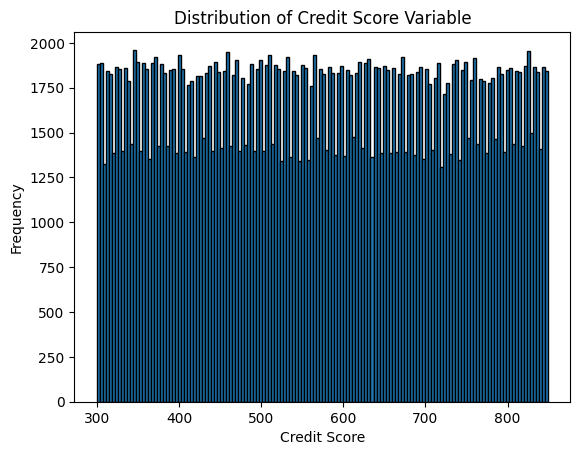

In [24]:

# Visualize the distribution of the target variable 'default"
plt.hist(data['CreditScore'], bins=150, edgecolor='black')
plt.title('Distribution of Credit Score Variable')   
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()  


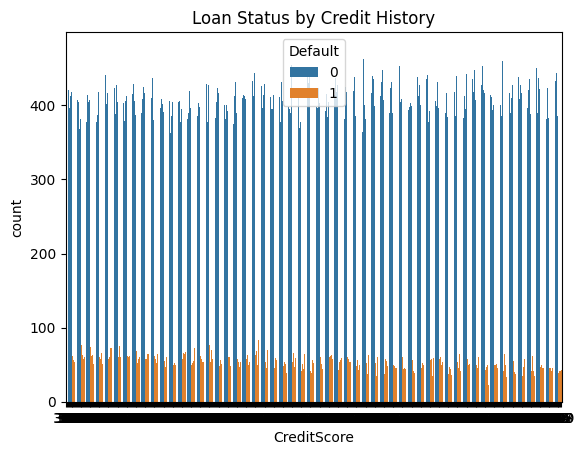

In [ ]:
sns.countplot(x='CreditScore', hue='Default', data=data)
plt.title("Loan Status by Credit History")
plt.show()

Model Training and Testing

In [25]:
# lets dive into  training and testing
print(data.columns)
from sklearn.model_selection import train_test_split
import sklearn.linear_model as LR
import sklearn.tree as tree
X_train, X_test, y_train, y_test = train_test_split(data[['Income', 'CreditScore' , 'LoanAmount' , 'DTIRatio']], data['Default'], test_size=0.2, random_state=42)


model = LR.LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)

model_tree = tree.DecisionTreeClassifier(class_weight='balanced', random_state=42)
model_tree.fit(X_train, y_train)    
y_pred_tree = model_tree.predict(X_test)


print("\n \n Logistic Regression vs Decision Tree Classifier \n\n")
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(" \n Decision Tree Classification Report: \n ")
print(classification_report(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(accuracy_score(y_test, y_pred_tree)*100)

print(" \n Logistic Regression Report: \n ")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred)*100)



# print(" \n Logistic Regression Classification Report:\n ")
# print(classification_report(y_test, y_pred))

# print(" \n Confusion Matrix for Logistic Regression: \n")
# print(confusion_matrix(y_test, y_pred))

# print(" \n Logistic Regression Accuracy: \n")
# print(accuracy_score(y_test, y_pred)*100)

# print(" \n Decision Tree Accuracy: \n")
# print(accuracy_score(y_test, y_pred_tree)*100)


Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

 
 Logistic Regression vs Decision Tree Classifier 


 
 Decision Tree Classification Report: 
 
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     45170
           1       0.14      0.15      0.14      5900

    accuracy                           0.80     51070
   macro avg       0.51      0.52      0.51     51070
weighted avg       0.80      0.80      0.80     51070

[[39920  5250]
 [ 5035   865]]
79.86097513217153
 
 Logistic Regression Report: 
 
              precision    recall  f1-score   support

           0       0.91      0.58      0.71     45170
           1       0.15      0.58      0.24      5900

    accuracy     

Checking if applicant is default or not through new data using models 

In [36]:
from sklearn.linear_model import LinearRegression


new_applicant = {
    "Income": 100010,
    "CreditScore": 650,
    "LoanAmount": 10000,
    "DTIRatio": 0.4
}

new_applicant_two = {
    "Income": 0,
    "CreditScore": 0,
    "LoanAmount": 0,
    "DTIRatio": 0.4
}
chek = pd.DataFrame([new_applicant])
predicted_default = model.predict(chek)
print(f"Predicted Default for the new applicant through LR : {predicted_default}")

chek_two = pd.DataFrame([new_applicant_two])
predicted_default_ = model_tree.predict(chek_two)
print(f"Predicted Default for the new applicant through Tree: {predicted_default_}")



Predicted Default for the new applicant through LR : [0]
Predicted Default for the new applicant through Tree: [1]
